# Import Library

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

# methods

In [3]:
def image_normalization(arr):
    return (arr - arr.min())/(arr.max()-arr.min())

# Data read

In [4]:
train_x = np.load('/content/drive/MyDrive/CVPR-NAS-2021/data/train_x.npy')
test_x = np.load('/content/drive/MyDrive/CVPR-NAS-2021/data/test_x.npy')
val_x = np.load('/content/drive/MyDrive/CVPR-NAS-2021/data/valid_x.npy')
train_y = np.load('/content/drive/MyDrive/CVPR-NAS-2021/data/train_y.npy')
test_y = np.load('/content/drive/MyDrive/CVPR-NAS-2021/data/test_y.npy')
val_y = np.load('/content/drive/MyDrive/CVPR-NAS-2021/data/valid_y.npy')

# Image Normalization

In [5]:
train_x = image_normalization(train_x)
test_x = image_normalization(test_x)
val_x = image_normalization(val_x)

In [6]:
train_y = to_categorical(train_y, num_classes=4)
val_y = to_categorical(val_y, num_classes=4)
test_y = to_categorical(test_y, num_classes=4)

In [7]:
train_x = train_x.transpose((0, 2, 3, 1))
test_x = test_x.transpose((0, 2, 3, 1))
val_x = val_x.transpose((0, 2, 3, 1))

# Plot Random Image

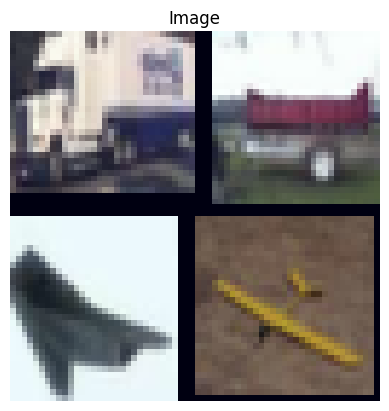

[0. 1. 0. 0.]


In [8]:
Random_Num = np.random.randint(0,(len(train_x)-1))
img = train_x[Random_Num]

plt.imshow(img)
plt.title('Image')
plt.axis('off')
plt.show()
print(train_y[Random_Num])

In [9]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models, datasets
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [10]:
base_model = ResNet50(weights=None, include_top=False, input_shape=(64, 64, 3))

model = models.Sequential()
model.add(base_model)
model.add(layers.GlobalAveragePooling2D())
model.add(layers.Dense(4, activation='softmax'))

# Compile the Model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])


In [11]:
history = model.fit(train_x, train_y, batch_size=64,epochs=20,validation_data =( val_x, val_y))

Epoch 1/20
704/704 [==============================] - 122s 100ms/step - loss: 1.5134 - accuracy: 0.2749 - val_loss: 1.7086 - val_accuracy: 0.3399
Epoch 2/20
704/704 [==============================] - 59s 84ms/step - loss: 1.3472 - accuracy: 0.3508 - val_loss: 1.4526 - val_accuracy: 0.3703
Epoch 3/20
704/704 [==============================] - 60s 85ms/step - loss: 1.2916 - accuracy: 0.3816 - val_loss: 1.4943 - val_accuracy: 0.3856
Epoch 4/20
704/704 [==============================] - 60s 85ms/step - loss: 1.2759 - accuracy: 0.3873 - val_loss: 1.6729 - val_accuracy: 0.3354
Epoch 5/20
704/704 [==============================] - 59s 84ms/step - loss: 1.2426 - accuracy: 0.4044 - val_loss: 1.3989 - val_accuracy: 0.3766
Epoch 6/20
704/704 [==============================] - 59s 84ms/step - loss: 1.2189 - accuracy: 0.4124 - val_loss: 1.9923 - val_accuracy: 0.2600
Epoch 7/20
704/704 [==============================] - 59s 84ms/step - loss: 1.1896 - accuracy: 0.4333 - val_loss: 1.9357 - val_accurac

In [13]:
model.evaluate(test_x, test_y, batch_size=200)

50/50 [==============================] - 4s 62ms/step - loss: 1.1598 - accuracy: 0.4972


[1.159848690032959, 0.49720001220703125]

In [13]:
history = model.fit(data_gen.flow(train_x, train_y, batch_size=32), epochs=10, validation_data=(val_x, val_y))

Epoch 1/10
1407/1407 [==============================] - 169s 85ms/step - loss: 1.5573 - accuracy: 0.2566 - val_loss: 1.4830 - val_accuracy: 0.2497
Epoch 2/10
1407/1407 [==============================] - 113s 80ms/step - loss: 1.4118 - accuracy: 0.3300 - val_loss: 1.4337 - val_accuracy: 0.3293
Epoch 3/10
1407/1407 [==============================] - 110s 78ms/step - loss: 1.3605 - accuracy: 0.3483 - val_loss: 1.2979 - val_accuracy: 0.3279
Epoch 4/10
1407/1407 [==============================] - 113s 81ms/step - loss: 1.3278 - accuracy: 0.3645 - val_loss: 1.3162 - val_accuracy: 0.3551
Epoch 5/10
1407/1407 [==============================] - 114s 81ms/step - loss: 1.3066 - accuracy: 0.3697 - val_loss: 1.5373 - val_accuracy: 0.2671
Epoch 6/10
1407/1407 [==============================] - 115s 81ms/step - loss: 1.2880 - accuracy: 0.3740 - val_loss: 1.5231 - val_accuracy: 0.3362
Epoch 7/10
1407/1407 [==============================] - 108s 77ms/step - loss: 1.2694 - accuracy: 0.3810 - val_loss: 1